https://www.rdkit.org/docs/GettingStartedInPython.html

In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


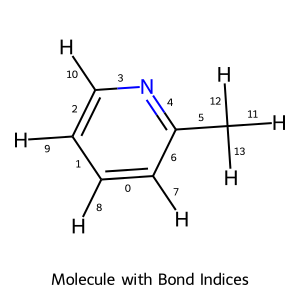

In [2]:
m = Chem.MolFromSmiles('c1cccnc1C')
m = Chem.AddHs(m)

for atom in m.GetAtoms():
    atom.SetProp("atomNote", "")  # Use "atomNote" to display atom indices

# # Draw the molecule with atom indices
# img = Draw.MolToImage(m, legend="Molecule with Atom Indices")
# img.show()

for bond in m.GetBonds():
    bond.SetProp("bondNote", str(bond.GetIdx()))  # Use "bondNote" to display bond indices

# Draw the molecule with bond indices
img = Draw.MolToImage(m, legend="Molecule with Bond Indices")
img.show()

In [ ]:
import numpy as np

from rdkit.Chem import rdFingerprintGenerator
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=10)

ao = rdFingerprintGenerator.AdditionalOutput()
ao.CollectBitInfoMap()


m = Chem.MolFromSmiles('c1cccnc1C')
morganFP = fpgen.GetSparseFingerprint(m, additionalOutput=ao)

np.array(morganFP)

NameError: name 'np' is not defined

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import torch
m = Chem.MolFromSmiles('c1cccnc1C')
m = Chem.AddHs(m) 
ao = AllChem.AdditionalOutput()

ao.CollectBitInfoMap()
fpgen = AllChem.GetMorganGenerator(radius=2, fpSize=1024, )


morganFP = fpgen.GetFingerprint(m, additionalOutput=ao)
# print(torch.tensor(morganFP), len(morganFP), len(torch.tensor(morganFP)), len(torch.tensor(morganFP).nonzero()))

In [18]:
AllChem.GetMorganGenerator == Chem.rdFingerprintGenerator.GetMorganGenerator

True

In [11]:
help(AllChem.GetMorganGenerator)

Help on built-in function GetMorganGenerator in module rdkit.Chem.rdFingerprintGenerator:

GetMorganGenerator(...)
    GetMorganGenerator([  (int)radius=3 [, (bool)countSimulation=False [, (bool)includeChirality=False [, (bool)useBondTypes=True [, (bool)onlyNonzeroInvariants=False [, (bool)includeRingMembership=True [, (AtomPairsParameters)countBounds=None [, (int)fpSize=2048 [, (AtomPairsParameters)atomInvariantsGenerator=None [, (AtomPairsParameters)bondInvariantsGenerator=None [, (bool)includeRedundantEnvironments=False]]]]]]]]]]]) -> FingerprintGenerator64 :
        Get a morgan fingerprint generator
        
          ARGUMENTS:
            - radius:  the number of iterations to grow the fingerprint
            - countSimulation: if set, use count simulation while generating the fingerprint
            - includeChirality: if set, chirality information will be added to the generated fingerprint
            - useBondTypes: if set, bond types will be included as a part of the default

In [9]:
bi = ao.GetBitPaths()
bi

{}

In [ ]:
bi = ao.GetBitInfoMap()
bi

In [8]:
2392445291 % 2048, 55253355 % 2048

(363, 363)

In [5]:
bi = ao.GetBitInfoMap()
bi

{55253355: ((7, 1), (8, 1), (9, 1), (10, 1)),
 62162552: ((1, 2),),
 442148024: ((3, 2),),
 447750523: ((6, 1),),
 1028523287: ((6, 2),),
 1064828642: ((0, 2),),
 1100037548: ((4, 1),),
 1130134577: ((0, 1),),
 1759772490: ((5, 2),),
 2041434490: ((4, 0),),
 2063064224: ((3, 1),),
 2246728737: ((6, 0),),
 2392445291: ((1, 1), (2, 1)),
 2615172355: ((4, 2),),
 2730584333: ((2, 2),),
 3217380708: ((5, 0),),
 3218693969: ((0, 0), (1, 0), (2, 0), (3, 0)),
 3321501787: ((11, 1), (12, 1), (13, 1)),
 4036277955: ((5, 1),),
 4277593716: ((7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0))}

In [6]:

for r in range(0, radius+1):
    print("radius", r)
    for bit in bi:
        
        if bi[bit][0][1] == r:
            mfp2_svg = Draw.DrawMorganBit(m, bit, bi, useSVG=True)
            # print(bi[bit])
            # display(mfp2_svg)

radius 0
radius 1
radius 2


In [7]:
"""deprecated because we want circular subgraphs
"""
def get_sub_graphs(smiles):
    RADIUS_UPPER_LIMIT = 2
    m = Chem.MolFromSmiles(smiles)
    m = Chem.AddHs(m) # not needed because we look at SMILES, not like generate_FPs
    all_subgraphs_smiles = set()
    for radius in range(RADIUS_UPPER_LIMIT+1):
        print(f"radius: {radius}")
        subgraphs = Chem.FindUniqueSubgraphsOfLengthN(m, radius)
        for subgraph in subgraphs:
            # Get the subgraph as a new molecule
            submol = Chem.PathToSubmol(m, subgraph)
            smiles = Chem.MolToSmiles(submol, canonical=True)
            all_subgraphs_smiles.add(smiles)
            # print(smiles)
            # img = Draw.MolToImage(submol, size=(100, 90))
            # img.show()
    # print(len(all_subgraphs_smiles))
    return all_subgraphs_smiles
get_sub_graphs("c1cccnc1C")

radius: 0
radius: 1
radius: 2


{'Ccn', 'cC', 'cc', 'ccC', 'ccc', 'ccn', 'cn', 'cnc'}

In [19]:

def get_circular_substructures(smiles, radius=2):
    # Example molecule
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)

    # Compute Morgan fingerprint with radius 
    info = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=radius, bitInfo=info)
    print(f"Number of bits set: {len(fp.GetNonzeroElements())}")
    # Extract circular subgraphs
    circular_substructures = set()
    # display(info)
    for bit_id, atom_envs in info.items():
        print(f"Bit ID: {bit_id}")
        for atom_idx, radius in atom_envs:
            # Get the circular environment as a subgraph
            env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom_idx)
            submol = Chem.PathToSubmol(mol, env)
            smiles = Chem.MolToSmiles(submol)
            if smiles in circular_substructures:
                print(f"Already found: {smiles}")
            circular_substructures.add(smiles)
            
            print(smiles)
            break
    display(circular_substructures)
    print(f"Number of circular substructures: {len(circular_substructures)}")

smile = 'c1cccnc1C'
get_circular_substructures(smile)

Number of bits set: 20
Bit ID: 55253355
[H]c
Bit ID: 62162552
ccccc
Bit ID: 442148024
cccnc
Bit ID: 447750523
cC
Bit ID: 1028523287
cc(C)n
Bit ID: 1064828642
cccc(C)n
Bit ID: 1100037548
cnc
Bit ID: 1130134577
ccc
Bit ID: 1759772490
ccc(C)nc
Bit ID: 2041434490

Bit ID: 2063064224
ccn
Bit ID: 2246728737
Already found: 

Bit ID: 2392445291
Already found: ccc
ccc
Bit ID: 2615172355
ccnc(c)C
Bit ID: 2730584333
ccccn
Bit ID: 3217380708
Already found: 

Bit ID: 3218693969
Already found: 

Bit ID: 3321501787
[H]C
Bit ID: 4036277955
Already found: cc(C)n
cc(C)n
Bit ID: 4277593716
Already found: 



[01:06:32] DEPRECATION WARNING: please use MorganGenerator


{'',
 '[H]C',
 '[H]c',
 'cC',
 'cc(C)n',
 'ccc',
 'ccc(C)nc',
 'cccc(C)n',
 'ccccc',
 'ccccn',
 'cccnc',
 'ccn',
 'ccnc(c)C',
 'cnc'}

Number of circular substructures: 14


((0, 1),)


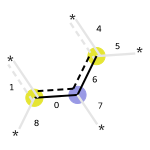

In [9]:
# from above code, bi is ao.GetBitInfoMap()
bit = 1130134577
mfp2_svg = Draw.DrawMorganBit(m, bit, bi, useSVG=True)
print(bi[bit])
display(mfp2_svg)

((0, 0), (1, 0), (2, 0), (3, 0))


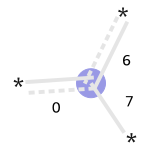

In [10]:
bit =  3218693969
mfp2_svg = Draw.DrawMorganBit(m, bit, bi, useSVG=True)
print(bi[bit])
display(mfp2_svg)

My plan: find all sub-structures of my training set. when you run my model on the website, i can show you similar sub-structures.
questions to chemists:
1. radius 0 has empty smiles. Can i assume you don't need radius 0 infomation?
2. there are two Cc(c)n and two ccc. Are they identical? Because the two Cc(c)n correspond to different bits in morganfingerprint but they have same smiles (so same bit position in my version of fingerprint). I want to confirm it is fine to consider them as the same

Number of bits set: 20
bit id(hash): 2041434490: 
radius: 0


[20:50:25] DEPRECATION WARNING: please use MorganGenerator


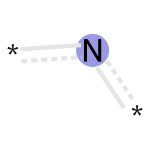

bit id(hash): 2246728737: 
radius: 0


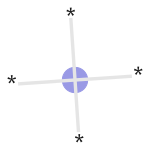

bit id(hash): 3217380708: 
radius: 0


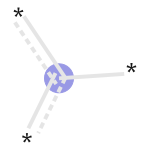

bit id(hash): 3218693969: 
radius: 0


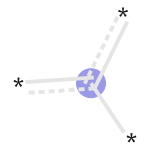

bit id(hash): 4277593716: 
radius: 0


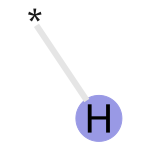

bit id(hash): 55253355: [H]c
radius: 1


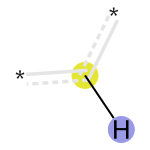

bit id(hash): 447750523: cC
radius: 1


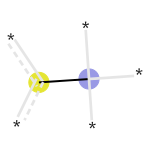

bit id(hash): 1100037548: cnc
radius: 1


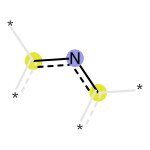

bit id(hash): 1130134577: ccc
radius: 1


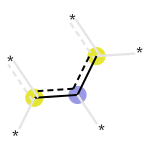

bit id(hash): 2063064224: ccn
radius: 1


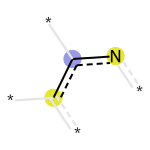

bit id(hash): 2392445291: ccc
radius: 1


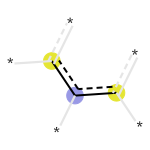

bit id(hash): 3321501787: [H]C
radius: 1


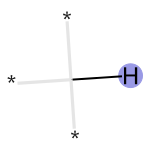

bit id(hash): 4036277955: cc(C)n
radius: 1


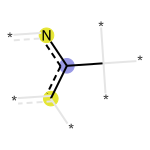

bit id(hash): 62162552: ccccc
radius: 2


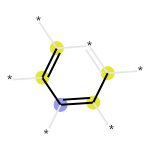

bit id(hash): 442148024: cccnc
radius: 2


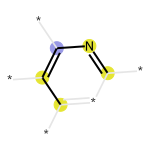

bit id(hash): 1028523287: cc(C)n
radius: 2


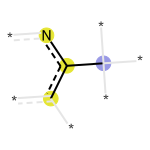

bit id(hash): 1064828642: cccc(C)n
radius: 2


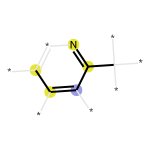

bit id(hash): 1759772490: ccc(C)nc
radius: 2


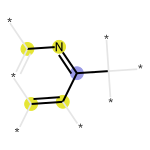

bit id(hash): 2615172355: ccnc(c)C
radius: 2


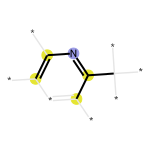

bit id(hash): 2730584333: ccccn
radius: 2


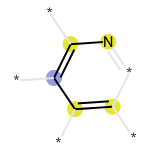

{55253355,
 62162552,
 442148024,
 447750523,
 1028523287,
 1064828642,
 1100037548,
 1130134577,
 1759772490,
 2041434490,
 2063064224,
 2246728737,
 2392445291,
 2615172355,
 2730584333,
 3217380708,
 3218693969,
 3321501787,
 4036277955,
 4277593716}

In [11]:
def show_fp_bits(smiles, radius, show_imag =True):
    # Example molecule
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    all_bits = set()
    # Compute Morgan fingerprint with radius 
    info = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=radius, bitInfo=info)
    print(f"Number of bits set: {len(fp.GetNonzeroElements())}")
    # Extract circular subgraphs
    # display(info)
    for r in range(0, radius+1):
        for bit_id, atom_envs in info.items():
            all_bits.add(bit_id)
            for atom_idx, curr_r in atom_envs:
                if curr_r != r:
                    continue
                # Get the circular environment as a subgraph
                env = Chem.FindAtomEnvironmentOfRadiusN(mol, curr_r, atom_idx)
                submol = Chem.PathToSubmol(mol, env)
                smiles = Chem.MolToSmiles(submol)
                
            
                print(f"bit id(hash): {bit_id}: {smiles}")
                print(f"radius: {r}")
                if show_imag:
                    mfp2_svg = Draw.DrawMorganBit(mol, bit_id, info, useSVG=True)
                    display(mfp2_svg)
                break
            
    return all_bits

smile = 'c1cccnc1C'
show_fp_bits("c1cccnc1C", 2)

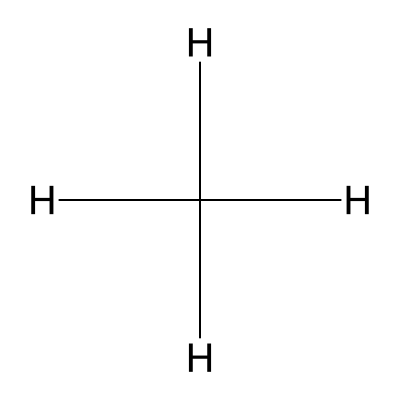

In [12]:
# smiles = "OCC1OC(OC2C(CO)OC(OC3C(CO)OC(OC4C(CO)OC(O)C(O)C4O)C(O)C3O)C(O)C2O)C(O)C(O)C1O"
smiles = "C"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Draw.MolToImage(mol, size=(400, 400))

Number of bits set: 4
bit id(hash): 2246733040: 
radius: 0


[20:51:49] DEPRECATION WARNING: please use MorganGenerator


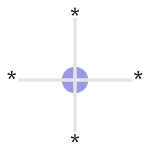

bit id(hash): 4277593716: 
radius: 0


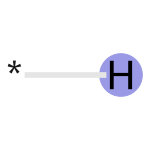

bit id(hash): 2818948702: 
radius: 1


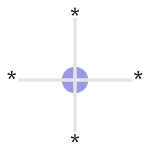

bit id(hash): 3321497372: [H]C
radius: 1


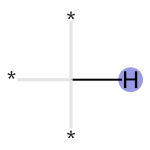

{2246733040, 2818948702, 3321497372, 4277593716}

In [13]:
show_fp_bits("C", 8)

In [47]:
show_fp_bits('c1ccccc1C(=O)O', 2, show_imag=False)

Number of bits set: 20
radius: 0
864662311: 
864942730: 
2246699815: 
3217380708: 
3218693969: 
4277593716: 
radius: 1
55253355: [H]c
127271038: CO
1130134577: ccc
1510328189: C=O
2392445291: ccc
2784506312: cC(O)=O
2994748777: Cc(c)c
3072032085: [H]O
radius: 2
62162552: ccccc
364495723: cC(O)=O
1448962966: cc(c)C(O)=O
2938016831: ccc(cc)C(O)=O
3434436707: ccccc
3782239696: Cc(c)ccc


{55253355,
 62162552,
 127271038,
 364495723,
 864662311,
 864942730,
 1130134577,
 1448962966,
 1510328189,
 2246699815,
 2392445291,
 2784506312,
 2938016831,
 2994748777,
 3072032085,
 3217380708,
 3218693969,
 3434436707,
 3782239696,
 4277593716}

In [12]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
import numpy as np
x = np.array(AllChem.GetMorganFingerprintAsBitVect(m,15,nBits=6144))
len(x)

[03:04:11] DEPRECATION WARNING: please use MorganGenerator


6144

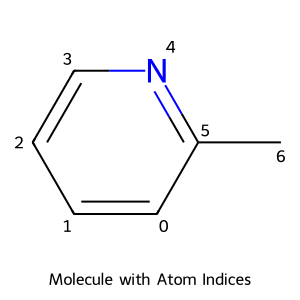

In [101]:
atoms

{0, 4, 5, 6}

In [49]:
bits1 = show_fp_bits("OCC1OC(OC2C(CO)OC(OC3C(CO)OC(OC4C(CO)OC(O)C(O)C4O)C(O)C3O)C(O)C2O)C(O)C(O)C1O",
             2,
             show_imag=False)   
bits2 = show_fp_bits('c1ccccc1C(=O)O', 2, show_imag=False)

Number of bits set: 36
radius: 0
864662311: 
864674487: 
2245384272: 
2976033787: 
3189457552: 
4277593716: 
radius: 1
828524593: [H]C
920763749: COC
980906191: CO
1499870378: CC(O)O
1735962896: CC(C)O
1740830013: CO
2341235807: CC(C)O
2667063169: COC
2928264258: CC(C)O
3072032085: [H]O
3147550929: CCO
3309593724: [H]C
3871699279: CC(O)O
radius: 2
142467889: CCO
442065971: CC(C)OC(C)O
462124800: CC(O)C(O)C(O)O
909541062: CC(O)O
935711045: CC(O)C(O)C(C)O
951667725: CC(C)OC(C)O
1987336728: COC(OC)C(C)O
2080774098: CC(O)CO
2425510740: CC(O)C(O)C(C)O
2675651241: COC(CO)C(C)O
3114427839: COC(C(C)O)C(C)O
3595290954: CC(C)OC(C)O
3738479493: CC(O)C(O)C(O)O
3821588491: CC(O)C(O)C(C)O
3959747184: COC(CO)C(C)O
4120809274: COC(O)C(C)O
4156912708: CC(C)O
Number of bits set: 20
radius: 0
864662311: 
864942730: 
2246699815: 
3217380708: 
3218693969: 
4277593716: 
radius: 1
55253355: [H]c
127271038: CO
1130134577: ccc
1510328189: C=O
2392445291: ccc
2784506312: cC(O)=O
2994748777: Cc(c)c
3072032085: [

In [51]:
print(len(bits1), len(bits2))
print(len(bits1.intersection(bits2)))
print(len(bits1.union(bits2)))

36 20
3
53


In [29]:
for x in env:
    print(x)
print(len(env))

2
3
1
4
0
5
6
7
